Treinando uma rede neural
=========================



## Introdução



Depois de uma longa jornada, finalmente chegamos ao *season finale* da nossa saga para construir uma rede neural artificial em Python puro. Agora que já conseguimos criar uma rede neural, o próximo passo é treinar essa rede.



## Objetivo



Treinar uma rede neural artificial tipo Multilayer Perceptron usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### Classes



Abaixo estão as classes que criamos no notebook anterior. Elas são as classes de base para criarmos nossa rede neural MLP. Ao longo deste notebook vamos fazer as últimas modificações nelas.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos                        # parâmtro que a classe Neuronio cria; é uma lista
        self.vies = Valor(random.uniform(-1, 1))  # parâmtro que a classe Neuronio cria

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."

        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p

        soma = soma + self.vies
        dado_de_saida = soma.sig()
        return dado_de_saida
    
    def parametros(self):
        return self.pesos + [self.vies]  # precisamos aplicar uma lista ao viés, pois pesos tambem é uma lista; uma soma de listas é concatenada, #
                                         # resultando em uma nova lista                                                                           #


class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas
        
    def parametros(self):  # iterando neurônios
        params = []
        
        for neuronio in self.neuronios:
            params.extend(neuronio.parametros())  # o .extend adiciona uma lista a outra, resultando em uma nova lista
        return params


class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):   # iterando camadas
        params = []
        
        for camada in self.camadas:
            params.extend(camada.parametros())
        return params

<font color='lightseagreen'> Se eu utilizar um `.append` ao invés de `.extend` para adicionar duas listas, ele vai litelmente jogar uma lista dentro da outra. Por exemplo, tenho duas listas, <i>a</i> e <i>b</i>: </font>

<font color='lightseagreen'> a = [1,2,3,4] </font>
<font color='lightseagreen'> b = [5,6,7,8] </font>

<font color='lightseagreen'> Usando um `.append` para unir as duas, isso resultará em: </font>

<font color='lightseagreen'> a.append(b) = [1,2,3,4,[5,6,7,8] </font>

<font color='lightseagreen'> Entretanto, com o `.extend`, teremos: </font>

<font color='lightseagreen'> a.extend(b) = [1,2,3,4,5,6,7,8] </font>

### A função de perda (*loss function*)



Fomos ao laboratório e sintetizamos 4 amostras de [complete com o que quiser]. Cada uma dessas amostras foi feita variando 3 parâmetros de processamento diferentes. Estas amostras e seus parâmetros de processamento estão representados na variável `x` abaixo.

Levamos essas 4 amostras no equipamento [complete com o que quiser] e obtivemos uma resposta que está representada na variável `y_true` abaixo.



In [3]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Queremos treinar uma MLP que seja capaz de modelar o comportamento que observamos. Isto é, queremos uma rede neural que receba informação sobre os 3 parâmetros de processamento e que com isso seja capaz de prever qual o resultado que teríamos no equipamento que mencionamos no parágrafo anterior.

Vamos, primeiramente, criar uma rede neural simples do tipo MLP.



In [4]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Com nossa rede criada, podemos realizar uma previsão! Mas muito provavelmente esta previsão será bastante subótima.



In [5]:
y_pred = []

for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.2983725053140956), Valor(data=0.3025862684831101), Valor(data=0.3026943131140689), Valor(data=0.3012333647183097)]


<font color='lightseagreen'> Como a rede não foi treinada, os valores previsto não foram quantificados de maneira igual. Os valores retornados não eram esperados. Para que esses valores sejam colapsados para os dados reais, precisamos definir uma função de perda usando o método de mínimos quadrados. </font>

Nosso resultado, assim como esperado, é bastante subótimo. Mas como quantificar isso? Seria bom se existisse uma forma de quantificar em um único número o quão boa está a previsão da minha rede.

Uma forma de quantificar a qualidade da previsão é usando uma `função de perda`, mais conhecida como `loss function`. Aqui podemos, por exemplo, computar a soma dos erros quadráticos. Esta é uma função de perda muito usada em problemas de regressão.



In [6]:
erros_quadrados = []

for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
print(loss)

Valor(data=0.6338938884209266)


A variável `loss` é uma medida da performance da rede neural que criamos. Essa variável é uma instância de `Valor`, logo podemos facilmente observar o grafo computacional desta métrica.



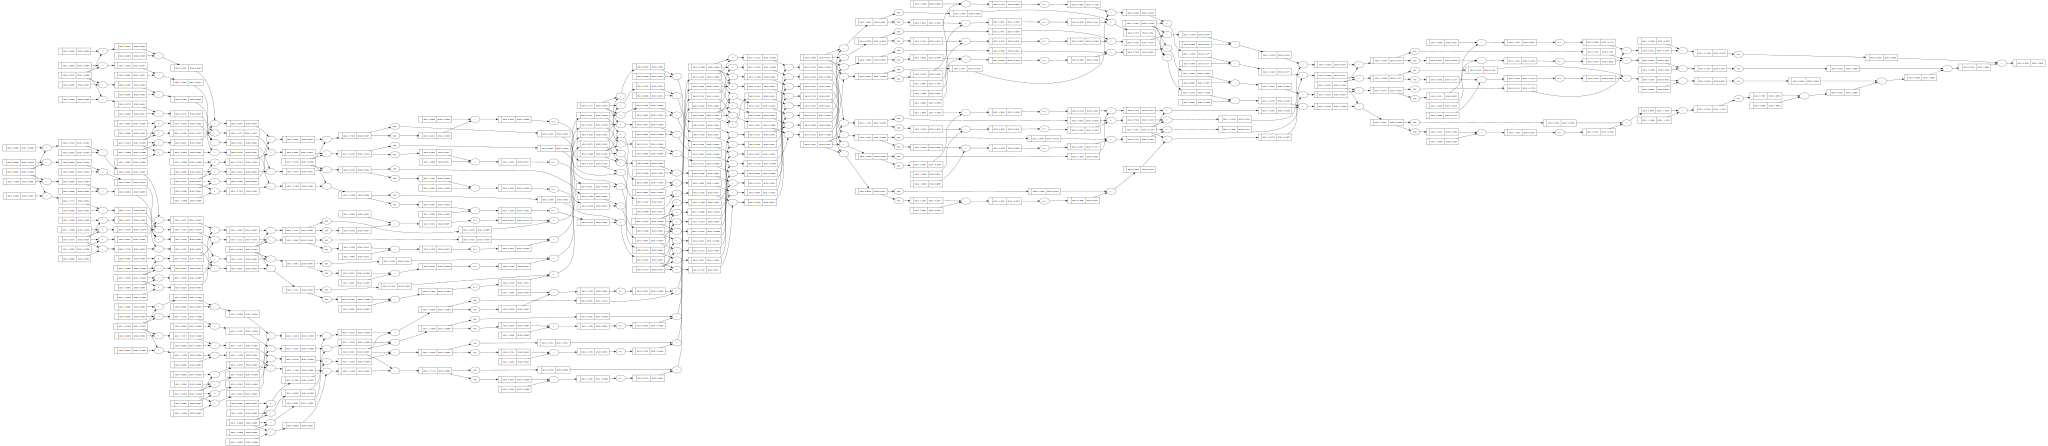

In [7]:
loss.propagar_tudo()
grafo = plota_grafo(loss)
grafo.render("rede_neural", format="png")
grafo

### Treinando a rede através da atualização dos parâmetros



Como vimos acima, o grafo computacional da nossa rede neural é bastante complexo! Cheio de vértices!

Nosso objetivo é treinar a rede neural que criamos, sendo que para isso precisamos alterar os parâmetros internos da rede. O primeiro passo para fazer isso é alterar as nossas classes de forma que o código abaixo funcione.



<font color='lightseagreen'> Para isso, deveremos criar um método chamado `parametros`, implementando-os em cada uma das classe da nossa rede neural artificial. </font>

In [8]:
parametros = minha_mlp.parametros()

print(len(parametros))
print()
parametros

23



[Valor(data=0.8856368627897881),
 Valor(data=0.9246562825936613),
 Valor(data=-0.022020810152251657),
 Valor(data=-0.23220794596460181),
 Valor(data=0.6775804897487745),
 Valor(data=-0.06269027376463532),
 Valor(data=0.7812855532441718),
 Valor(data=-0.7625739922405801),
 Valor(data=-0.639019097895078),
 Valor(data=-0.9424205091463715),
 Valor(data=-0.660000987101429),
 Valor(data=0.3320021733695171),
 Valor(data=0.7117446258319133),
 Valor(data=-0.8514746846758732),
 Valor(data=0.966345597475929),
 Valor(data=0.6863751394791309),
 Valor(data=0.384961295923006),
 Valor(data=0.6179481991186988),
 Valor(data=-0.9000422178485092),
 Valor(data=0.6276678512350577),
 Valor(data=-0.3616693912287363),
 Valor(data=-0.39713970782071906),
 Valor(data=-0.2781591056247066)]

Agora que conseguimos &ldquo;extrair&rdquo; os parâmetros da nossa MLP, podemos fazer o treino deles! Temos que pensar bem como alterar os parâmetros da maneira correta. Lembre-se que nosso desejo é reduzir a métrica computada pela função de perda.



In [9]:
TAXA_DE_APRENDIZADO = 0.01

for p in minha_mlp.parametros():
    p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

Agora que executamos um &ldquo;ciclo&rdquo; de treino, podemos observar o impacto disso!



In [10]:
y_pred = []
for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

erros_quadrados = []
for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
loss.propagar_tudo()
print(loss)

Valor(data=0.6329471476548508)


### A descida do gradiente



Apenas um &ldquo;ciclo&rdquo; de treino costuma não ser suficiente para treinarmos uma rede neural, precisamos de mais! Antes de seguir em frente, vamos definir um termo: chamamos de `época` toda vez que nossa rede neural propaga *todo* nosso dataset. É comum treinarmos redes neurais por dezenas, centenas e até milhares de épocas!

Vamos programar um treino completo da rede neural!

Um detalhe: sempre temos que zerar os gradientes antes de fazer o backpropagation. Isso é necessário pois cada vez que alteramos os parâmetros estaremos em outra posição da curva de perda e os gradientes antigos já não são mais válidos.



<font color='lightseagreen'> Toda vez que a rede vê os dados, ou seja, todos os dados já passaram pela rede e a perda é reduzida, uma época se passou. Cada problema terá um número de épocas. Quando dizemos que uma rede tem 100 épocas, significa que os dados passaram pela rede 100 vezes e a perda foi reduzida em 100 vezes. </font>

In [11]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]
minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [12]:
NUM_EPOCAS = 10
TAXA_DE_APRENDIZADO = 0.1

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for x_ in x:
        previsao = minha_mlp(x_)
        y_pred.append(previsao)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0
    
    # loss; a perda e soma de todos os itens da nossa lista
    loss = []
    for yp, yt in zip(y_pred, y_true):
        loss.append((yp - yt)**2)
    loss = sum(loss)

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado
    print(epoca, loss.data)

0 0.769320386988176
1 0.7504742257974917
2 0.7321502256343986
3 0.714549558411175
4 0.6978570888666329
5 0.6822310749028155
6 0.6677947644559626
7 0.6546309271653401
8 0.6427799018546803
9 0.6322411726289369


Após o treino, podemos checar se nossa rede é capaz de prever os dados que coletamos com boa performance.



In [13]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.3017954784865989), Valor(data=0.30781751514903316), Valor(data=0.30594746080060664), Valor(data=0.303085978953864)]


Esse processo de atualizar os parâmetros da rede neural observando os gradientes locais é chamado de `descida do gradiente` (ou apenas `método do gradiente`).



## Conclusão



Nessa reta final, agora costruimos o nosso penúltimo experimento de Redes Neurais Artificiais, em que finalmente pudemos aprender como treinar a nossa rede neural através de uma rede do tipo Multilayer Perceptron usando as mesmas classes com as quais trabalhamos no experimento R.06 sobre construir uma rede neural artificial por partes, a qual usa da nossa classe `Valor` como base para realizar as operações matemáticas necessárias. Nesse sentido, importamos essa classe, juntamente com a bibloteca de python `random` e a função `"plota_grafo"` para que fosse possível desenvolver a constução desse Notebook.

As classes com as quais trabalhamos foram as mesmas do notebook anterior, as quais usamos para construir a MLP que treinamos nesse notebook 7. Desta forma, foram necessárias algumas alterações nessas três classes, `Neuronio`, `Camada` e `MLP`, nesse caso, a função `parametros` que é responsável por somar duas listas de parâmetros para cada classe. Na primeira classe, ela apenas soma os pesos e os viéses do neurônio criado. Enquanto isso na segunda, ela itera vários neurônios criados pela classe `Neuronio`, bem como na terceira ela itera as camadas criadas pela classe `Camada`. O intuito disso é criar uma lista com todos os parâmetros da nossa rede neural sendo atualizados com a propagação dos dados.

Todo esse cálculo foi feito com o intuito de extrai os parâmetros que temos da nossa rede, para que se reduza a métrica da performance da rede, a qual foi encontrada pelo que chamamos de `função de perda`, ou seja, ela retorna qual é a traxa de previsão da minha rede neural. Por esse motivo, essa função é muito usada em Aprendizado de Máquina para problemas de regressão. Desta maneira, ela retorna apenas um valor que contém todas as informações sobre o quão boa está a previsão da minha rede. Quando ela não está muito boa, podemos usar o método de `parametros` para reduzir essa taxa.

Entretanto, tudo isso é apenas parte de um ciclo de treinamento da rede, o que não é o suficiente para que a rede esteja realmente treinada e retornando valores precisos. Por isso, emplementamos novos ciclos, chamados `épocas`, para completar o treino da rede neural. Fazemos isso através do <i>backpropagation</i> pelos gradientes da rede, um método muito utilizado para medir a precisão de cada iteração feita para a atualização dos parâmetros da rede.

E isso dá fim ao nosso processo de aprendizado e construção de uma rede neural.

## Playground

